In [3]:
# Set python libraries to dynamically reload so that we can edit
# the external text file while calling the function in the notebook
# without having to restart the kernel
%load_ext autoreload
%autoreload 2

In [26]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime



from functions import *
import seaborn as sns

In [5]:
sql_league = """
            SELECT L.name as LeagueName,
            C.name as CountryName
            FROM League as L
            JOIN Country as C
            ON C.id = L.country_id
            ;"""
df_league = make_sql_frame(sql_league)

In [6]:
df_league

,LeagueName,CountryName
0,Belgium Jupiler League,Belgium
1,England Premier League,England
2,France Ligue 1,France
3,Germany 1. Bundesliga,Germany
4,Italy Serie A,Italy
5,Netherlands Eredivisie,Netherlands
6,Poland Ekstraklasa,Poland
7,Portugal Liga ZON Sagres,Portugal
8,Scotland Premier League,Scotland
9,Spain LIGA BBVA,Spain


In [7]:
sql = """
            SELECT *
            FROM sqlite_sequence
            ;"""
df = make_sql_frame(sql)
df

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


In [8]:
sql_match = """
            SELECT Match.id, 
                    Country.name AS country_name, 
                    League.name AS league_name, 
                    season, 
                    stage, 
                    date,
                    HT.team_long_name AS  home_team,
                    AT.team_long_name AS away_team,
                    home_team_goal, 
                    away_team_goal                                        
            FROM Match
            JOIN Country on Country.id = Match.country_id
            JOIN League on League.id = Match.league_id
            LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
            LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
            ORDER by date
        ;"""
df_matches = make_sql_frame(sql_match)
df_matches.head()


,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0


In [9]:
df_matches = add_results(df_matches)
df_matches.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,HomeWin,AwayWin,Draw
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,0,1,0
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,1,0,0
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,0,1,0
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,0,1,0
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,1,0,0


In [10]:
df_results = calc_wins(df_matches)
print(df_results.shape)
df_results.head()

(296, 14)


,TeamName,HomeWin,HomeLoss,HomeDraw,HomeWinPct,AwayLoss,AwayWin,AwayDraw,AwayWinPct,TotalWins,TotalLosses,TotalDraws,GamesPlayed,TotalWinPct
0,1. FC Kaiserslautern,8,15,11,0.235294,18,9,7,0.264706,17,33,18,68,0.250000
1,1. FC Köln,32,39,31,0.313725,51,28,23,0.274510,60,90,54,204,0.294118
2,1. FC Nürnberg,30,34,21,0.352941,44,19,22,0.223529,49,78,43,170,0.288235
3,1. FSV Mainz 05,55,35,29,0.462185,50,33,36,0.277311,88,85,65,238,0.369748
4,AC Ajaccio,16,22,19,0.280702,30,6,21,0.105263,22,52,40,114,0.192982


In [11]:
sql_england = """
            SELECT Match.id, 
                    Country.name AS country_name, 
                    League.name AS league_name, 
                    season, 
                    stage, 
                    date,
                    HT.team_long_name AS  home_team,
                    AT.team_long_name AS away_team,
                    home_team_goal, 
                    away_team_goal                                        
            FROM Match
            JOIN Country on Country.id = Match.country_id
            JOIN League on League.id = Match.league_id
            LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
            LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
            WHERE country_name = 'England'
            ORDER by date
        ;"""
df_england = make_sql_frame(sql_england)
df_england.head()


,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,1730,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Arsenal,West Bromwich Albion,1,0
1,1731,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Sunderland,Liverpool,0,1
2,1732,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,West Ham United,Wigan Athletic,2,1
3,1734,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Everton,Blackburn Rovers,2,3
4,1735,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Middlesbrough,Tottenham Hotspur,2,1


In [12]:
df_england = add_results(df_england)
df_england_wins = calc_wins(df_england)
df_england_wins

,TeamName,HomeWin,HomeLoss,HomeDraw,HomeWinPct,AwayLoss,AwayWin,AwayDraw,AwayWinPct,TotalWins,TotalLosses,TotalDraws,GamesPlayed,TotalWinPct
0,Arsenal,97,21,34,0.638158,40,73,39,0.480263,170,61,73,304,0.559211
1,Aston Villa,45,57,50,0.296053,73,41,38,0.269737,86,130,88,304,0.282895
2,Birmingham City,14,7,17,0.368421,22,7,9,0.184211,21,29,26,76,0.276316
3,Blackburn Rovers,29,26,21,0.381579,45,13,18,0.171053,42,71,39,152,0.276316
4,Blackpool,5,9,5,0.263158,10,5,4,0.263158,10,19,9,38,0.263158
5,Bolton Wanderers,27,29,20,0.355263,47,16,13,0.210526,43,76,33,152,0.282895
6,Bournemouth,5,9,5,0.263158,9,6,4,0.315789,11,18,9,38,0.289474
7,Burnley,11,15,12,0.289474,28,4,6,0.105263,15,43,18,76,0.197368
8,Cardiff City,5,9,5,0.263158,13,2,4,0.105263,7,22,9,38,0.184211
9,Chelsea,101,17,34,0.664474,41,75,36,0.493421,176,58,70,304,0.578947


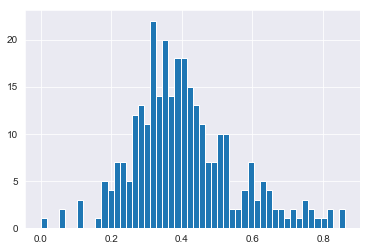

In [19]:
sns.set_style('darkgrid')
plt.hist(df_results['HomeWinPct'], bins =50)
plt.show()

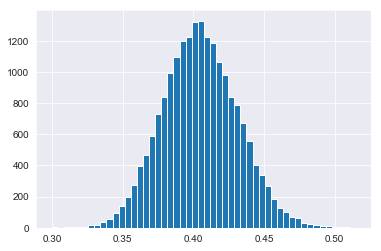

In [28]:
match_sample = [sample_mean(df_results['HomeWinPct'], 30) for i in range(20000)]
plt.hist(match_sample, bins=50)
plt.show()

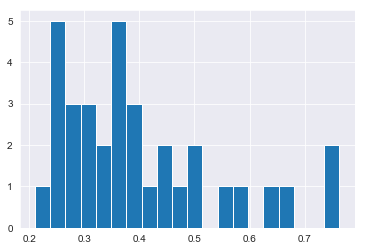

In [21]:
sns.set_style('darkgrid')
plt.hist(df_england_wins['HomeWinPct'], bins =20)
plt.show()

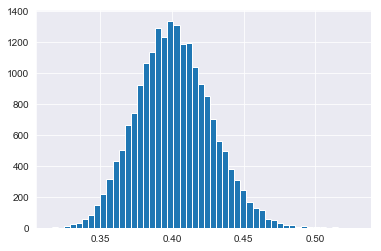

In [29]:
england_sample = [sample_mean(df_england_wins['HomeWinPct'], 30) for i in range(20000)]
plt.hist(england_sample, bins=50)
plt.show()

In [12]:
# df3 = df2.groupby(['home_team'])['HomeWin', 'AwayWin', 'Draw'].sum()
# df3['HomeWinPct'] = df3['HomeWin'] / (df3['HomeWin'] + df3['AwayWin'] + df3['Draw'])
# df3.rename(columns = {"AwayWin" : "HomeLoss", "Draw": "HomeDraw"}, inplace = True)

In [13]:
# df4 = df2.groupby(['away_team'])['HomeWin', 'AwayWin', 'Draw'].sum()
# df4['AwayWinPct'] = df4['AwayWin'] / (df4['HomeWin'] + df4['AwayWin'] + df4['Draw'])
# df4.rename(columns = {"HomeWin" : "AwayLoss", "Draw" : "AwayDraw"}, inplace = True)

In [52]:
# df5 = pd.concat([df3,df4], axis =1)

In [53]:
# df5['TotalWins'] = df5['HomeWin'] + df5['AwayWin']
# df5['TotalLosses'] = df5['HomeLoss'] + df5['AwayLoss']
# df5['TotalDraws'] = df5['HomeDraw'] + df5['AwayDraw']
# df5['GamesPlayed'] = df5['TotalWins'] + df5['TotalLosses'] + df5['TotalDraws']
# df5['TotalWinPct'] = df5['TotalWins'] / df5['GamesPlayed']

In [54]:
# df5.reset_index(inplace = True)
# df5.rename(columns = {"index": "TeamName"}, inplace = True)

In [19]:
# df5